# 偏导数的链式法则

In [ ]:
from sympy import *
t = symbols('t')

g = Function('g')(t)
h = Function('h')(t)

f = Function('f')(g, h)

display(diff(f, t))

In [ ]:
from sympy import *
u, v = symbols('u, v')

g = Function('g')(u, v)
h = Function('h')(u, v)

f = Function('f')(g, h)

display(diff(f, u))
display(diff(f, v))

In [ ]:
from sympy import *
u, v = symbols('u, v')
g = Function('g')(u, v)
h = Function('h')(g)
f = Function('f')(h)

display(diff(f, u))

# 实现一个神经网络

out:
 [[-0.   -0.03]
 [ 0.16  0.5 ]
 [ 0.29  0.38]
 [ 0.48  0.28]
 [ 0.41  0.21]
 [ 0.21  0.17]
 [ 0.05  0.11]
 [ 0.24  0.43]
 [ 0.1   0.3 ]]


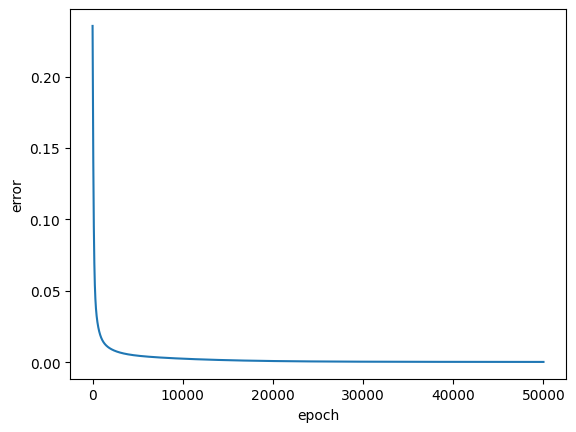

[[0.00748067 0.32298644]
 [0.31198705 0.21772994]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt


def tanh(x):
    return np.tanh(x)


def tanh_d(x):
    return 1-np.tanh(x)**2


def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))


def mse_d(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size


class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        self.errors = []

    def forward(self, X):
        # 前向传播
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)
        return self.a2

    def backward(self, X, y, output, epoch):
        # 反向传播
        m = X.shape[0]

        # 输出层误差
        d_W2 = np.zeros(self.W2.shape)
        d_b2 = np.zeros(self.b2.shape)
        self.errors.append(mse(y, output))
        # error_d = output - y
        error_d = mse_d(y, output)

        d_z2 = error_d * tanh_d(self.z2)
        d_W2 = np.dot(self.a1.T, d_z2) / m
        d_b2 = np.sum(d_z2, axis=0, keepdims=True) / m
        
        # 隐藏层误差
        d_z1 = np.dot(d_z2, self.W2.T) * tanh_d(self.z1)
        d_W1 = np.dot(X.T, d_z1) / m
        d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m
        
        # if epoch % 100 == 0:
        #     print('\n', epoch, '\nerror', error, '\nd_W1', d_W1, '\nd_b1', d_b1, '\nd_W2', d_W2, '\nd_b2', d_b2)

        # 更新权重和偏置
        learning_rate = 0.01
        self.W1 -= learning_rate * d_W1
        self.b1 -= learning_rate * d_b1
        self.W2 -= learning_rate * d_W2
        self.b2 -= learning_rate * d_b2
        # print(self.W1, self.b1, self.W2, self.b2)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            # print(f'{epoch}:')
            self.backward(X, y, output, epoch)

    def predict(self, X):
        return self.forward(X)

    def plot_errors(self):
        plt.plot(self.errors)
        plt.xlabel("epoch")
        plt.ylabel("error")
        plt.show()


X = np.array([[0, 0], [0.3, 1],   [0.6, 0.8], [1,  0.6], [0.8, 0.4], [0.4, 0.3],  [0.1,  0.2], [0.5, 0.9],  [0.2, 0.5]])
y = np.array([[0, 0], [0.15,0.5], [0.3, 0.4], [0.5,0.3], [0.4, 0.2], [0.2, 0.15], [0.05, 0.1], [0.25, 0.45],[0.1, 0.25]])

nn = SimpleNeuralNetwork(2, 3, 2)
nn.train(X, y, epochs=50000)
print('out:\n', np.round(nn.predict(X), 2))
nn.plot_errors()

print(nn.predict(np.array([[0, 0.5], [0.6, 0.4]])))